# Etude du Covid-19 en France 
SIR Model sur les données du Covid-19

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint
from scipy import optimize, integrate
import random 
from model.sir import SIRModel

In [2]:
data = pd.read_csv("data/EU/data.csv",sep=';')
data = data[data.nom == "France"]

# Data Exploration

In [3]:
print(data.columns)
print(data.dtypes)
print("Dates entre", min(data['date']) , "et",max(data['date']), ", totale de", data['date'].nunique(), "jours")
data['guerisons'] = data['guerisons'].replace(np.nan, 0)
data['deces'] = data['deces'].replace(np.nan,0)
data.head(10)

Index(['date', 'code', 'nom', 'cas', 'deces', 'guerisons', 'source'], dtype='object')
date          object
code          object
nom           object
cas          float64
deces        float64
guerisons    float64
source        object
dtype: object
Dates entre 2020-01-24 et 2020-05-14 , totale de 107 jours


,date,code,nom,cas,deces,guerisons,source
11166,2020-01-24,FRA,France,3.0,0.0,0.0,Santé Publique France
11167,2020-01-25,FRA,France,3.0,0.0,0.0,Santé Publique France
11168,2020-01-26,FRA,France,3.0,0.0,0.0,Santé Publique France
11169,2020-01-27,FRA,France,3.0,0.0,0.0,Santé Publique France
11170,2020-01-28,FRA,France,4.0,0.0,0.0,Santé Publique France
11171,2020-01-29,FRA,France,5.0,0.0,0.0,Santé Publique France
11172,2020-01-30,FRA,France,6.0,0.0,0.0,Santé Publique France
11173,2020-01-31,FRA,France,6.0,0.0,0.0,Santé Publique France
11174,2020-02-02,FRA,France,6.0,0.0,0.0,Santé Publique France
11175,2020-02-03,FRA,France,6.0,0.0,0.0,Santé Publique France


In [4]:
data.describe()

,cas,deces,guerisons
count,107.000000,107.000000,107.000000
mean,49990.224299,5254.570093,16485.140187
std,55550.819857,6462.589600,20988.512333
min,3.000000,0.000000,0.000000
25%,12.000000,1.000000,0.000000
50%,16689.000000,674.000000,2200.000000
75%,110536.500000,11660.000000,35201.500000
max,141356.000000,17224.000000,59605.000000


Text(0.5, 0, 'Date')

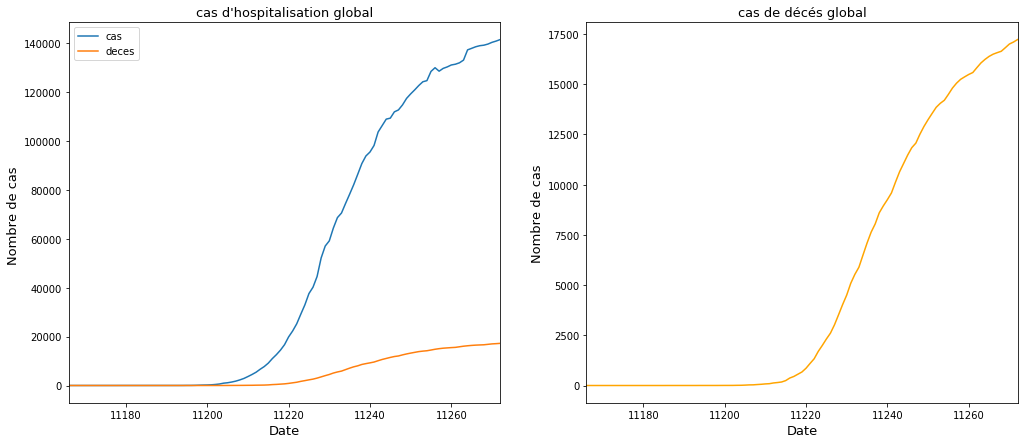

In [5]:
totalConfirme = data["cas"].to_frame()
totalDC = data["deces"]
totale = totalConfirme.join(totalDC)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
totale.plot(ax=ax1)
ax1.set_title("cas d'hospitalisation global", size=13)
ax1.set_ylabel("Nombre de cas ", size=13)
ax1.set_xlabel("Date", size=13)
totalDC.plot(ax=ax2, color='orange')
ax2.set_title("cas de décés global", size=13)
ax2.set_ylabel("Nombre de cas", size=13)
ax2.set_xlabel("Date", size=13)

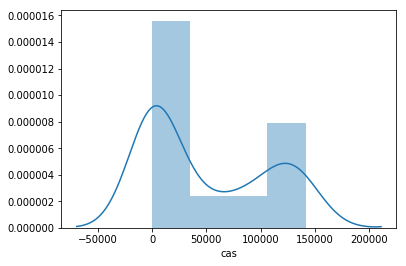

In [6]:
sns.distplot(data["cas"])

# Exemple du modéle SIR

https://www.kaggle.com/saga21/covid-global-forecast-sir-model-ml-regressions

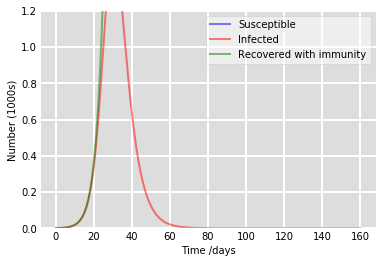

In [7]:
# Total population, N.
N = 10000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.6, 3./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T


# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# fit sur données synthetiques sans bruit 


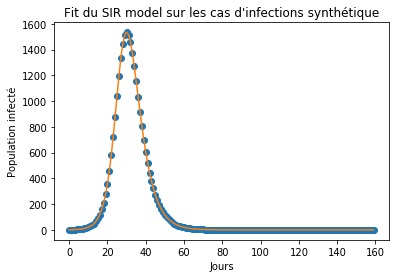

parameters: beta = 0.6037735849056587  and gamma =  0.30188679245282873


In [8]:
expectedBeta = 0.6
expectedGama = 3./10

infected = I

N=10000

x = [i for i in range (0,160)]
y = infected # infection géneré par le modéle précedent d'exemple 

a = SIRModel(N=N,I0=infected[0])

a.fit(x,y)

plt.plot(x, y, 'o')
plt.plot(x, a.predict(x)[1])
plt.title("Fit du SIR model sur les cas d'infections synthétique")
plt.ylabel("Population infecté")
plt.xlabel("Jours")
plt.show()
print("parameters: beta =", a.beta, " and gamma = ", a.gamma)


# fit sur données synthetiques avec bruit 


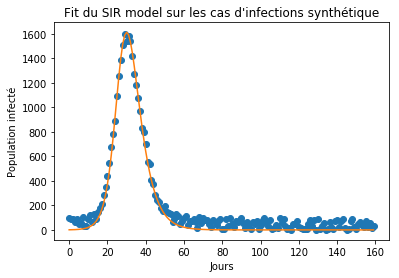

parameters: beta = 0.5949685364954594  and gamma =  0.2908427185825146


In [9]:
expectedBeta = 0.6
expectedGama = 3./10

infected = I + np.random.randint(100,size=160)

N=10000

x = [i for i in range (0,160)]
y = infected # infection géneré par le modéle précedent d'exemple 

a = SIRModel(N=N,I0=1)

a.fit(x,y)

plt.plot(x, y, 'o')
plt.plot(x, a.predict(x)[1])
plt.title("Fit du SIR model sur les cas d'infections synthétique")
plt.ylabel("Population infecté")
plt.xlabel("Jours")
plt.show()
print("parameters: beta =", a.beta, " and gamma = ", a.gamma)


# fit sur données réelles


/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/home_local/isduser/Desktop/projetCovid/projetCovid/model/sir.py:30: RuntimeWarning: overflow encountered in double_scalars
  dSdt = -beta * S * I / N
/home_local/isduser/Desktop/projetCovid/projetCovid/model/sir.py:31: RuntimeWarning: overflow encountered in double_scalars
  dRdt = gamma * I


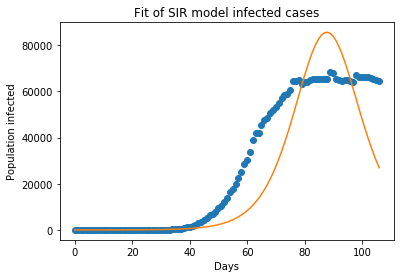

parameters: beta = 2.652159439674569  and gamma =  2.519200402364697


In [10]:
infected = data["cas"]  - data["guerisons"]  - data["deces"]
infected = list(infected)
N = 67000000

x = [i for i in range (0,len(infected))]
y = infected 

a = SIRModel(N=N,I0=infected[0])

a.fit(x,y)



plt.plot(x, y, 'o')
plt.plot(x, a.predict(x)[1])
plt.title("Fit of SIR model infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("parameters: beta =", a.beta, " and gamma = ", a.gamma)
